<a href="https://colab.research.google.com/github/Milkiiy/Stunting-Prediction/blob/main/Stunting_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Library**

In [ ]:
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**Menginisalisasi Dataset dan Menampilkan Sample Data**

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Stunting Prediction/data_balita.csv')
data.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


**Mengecek Missing Value, Tipe Data, Nilai Unique dan Describe Data**:

Dapat disimpulkan bahwa:

*   **Missing Value : 0**

*   **Tipe Data :**
1. Umur (bulan) -> int
2. Jenis Kelamin -> Object
3. Tinggi Badan (cm) -> Float
4. Status Gizi -> Object

*   **Data Unique :**
1. Umur (bulan) -> 61
2. Jenis Kelamin -> 2
3. Tinggi Badan (cm) -> 6800
4. Statuz Gizi -> 4

*   **Describe Data**
1. Total Data -> 120.999 Data
2. Rata rata Umur,Tinggi -> 30,88
3. Nilai Terendah Umur,Tinggi -> 0,40
4. Nilai Tertinggi Umur,Tinggi -> 60,128






In [ ]:
# Mengecek Missing Value
data.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [ ]:
# Mengecek Tipe Data
data.dtypes

Umur (bulan)           int64
Jenis Kelamin         object
Tinggi Badan (cm)    float64
Status Gizi           object
dtype: object

In [ ]:
# Mengecek Nilai Unique
data.nunique()

Umur (bulan)           61
Jenis Kelamin           2
Tinggi Badan (cm)    6800
Status Gizi             4
dtype: int64

In [ ]:
# Mengecek Statistik Data
data.describe()

,Umur (bulan),Tinggi Badan (cm)
count,120999.000000,120999.000000
mean,30.173803,88.655434
std,17.575119,17.300997
min,0.000000,40.010437
25%,15.000000,77.000000
50%,30.000000,89.800000
75%,45.000000,101.200000
max,60.000000,128.000000


**Melakukan Proses Encoding** </br>
Dengan menggolongkan Jenis Kelamin
1. Laki Laki : 0
2. Perempuan : 1

Penggolongan Jenis Stunting
1. Severely Stunted : 0
2. Stunted : 1
3. Normal : 2
4. Tinggi : 3

In [ ]:
# Mengkodekan Jenis Kelamin
data['Jenis Kelamin'] = data['Jenis Kelamin'].map({'laki-laki':0,'perempuan':1})

# Mengkodekan Status Gizi
data['Status Gizi'] = data['Status Gizi'].map({'severely stunted':0, 'stunted':1, 'normal':2, 'tinggi':3})
data.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,0,44.591973,1
1,0,0,56.705203,3
2,0,0,46.863358,2
3,0,0,47.508026,2
4,0,0,42.743494,0


**Visualisasi Data**

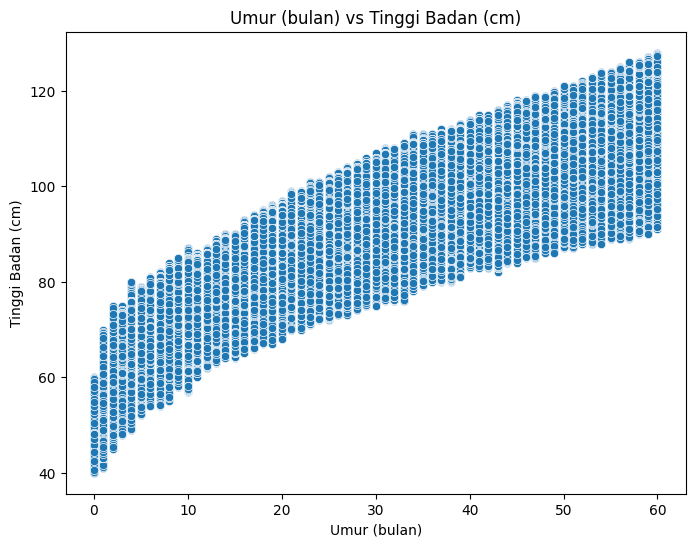

In [ ]:
# Visualisasi Data
df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Umur (bulan)', y='Tinggi Badan (cm)')
plt.title('Umur (bulan) vs Tinggi Badan (cm)')
plt.xlabel('Umur (bulan)')
plt.ylabel('Tinggi Badan (cm)')
plt.show()

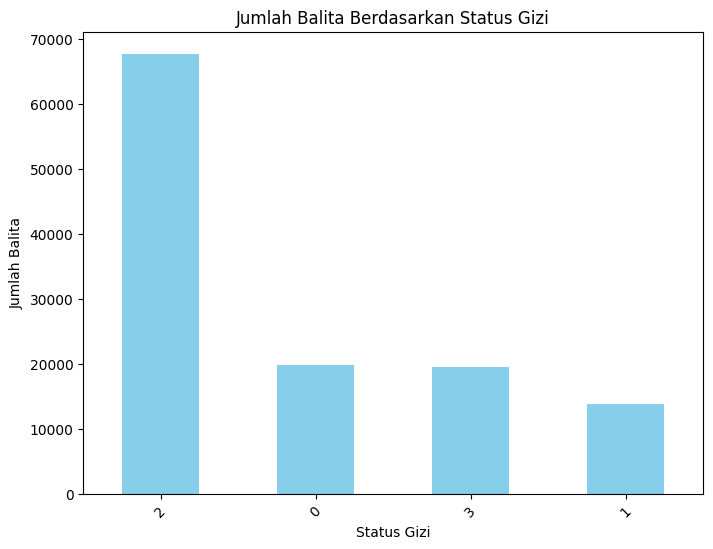

In [ ]:
status_counts = df['Status Gizi'].value_counts()

# Kode Pengelompokan
# 0:Severly Stunted ; 1:Stunted ; 2:Normal ; 3:Tinggi

# Membuat bar plot
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Balita Berdasarkan Status Gizi')
plt.xlabel('Status Gizi')
plt.ylabel('Jumlah Balita')
plt.xticks(rotation=45)
plt.show()

Pemisahan Fitur Dan Target kemudian Dataset dikelompokan menjadi 2 yaitu Data Train dan Data Uji </br>

Data yang kita pakai untuk Uji dan Training adalah 2:8 atau Data Uji 20% dan Data Latih 80% dengan random state = 0.

In [ ]:
# Memisahkan Fitur dan Target
X = data.iloc[:, 1:6]
X = data.drop('Status Gizi', axis=1)
y = data['Status Gizi']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
0,0,0,44.591973
1,0,0,56.705203
2,0,0,46.863358
3,0,0,47.508026
4,0,0,42.743494


**Melatih Data Training dengan menggunakan model SVM (Support Vector Machine)**</br>

Mengapa memakai SVM?

Dikarenakan SVM bertujuan untuk menemukan hyperplane terbaik yang memisahkan dua kelas data dengan margin maksimal. Hyperplane ini digunakan untuk membuat keputusan tentang kelas mana suatu data baru akan dimasukkan.<br>

SVM juga memiliki keunggulan dalam menangani data berdimensi tinggi dan data yang tidak terlalu banyak. Dikarenakan itulah kami menggunakan Model SVM ini untuk memprediksi Stunting atau tidak.

In [ ]:
model_SVM = svm.SVC(kernel='linear')
model_SVM.fit(X_train,y_train)
y_predict = model_SVM.predict(X_test)

Proses Input Parameter yaitu Umur,Kelamin dan Tinggi Badan yang akan mengeluarkan output berupa Prediksi Severely Stunted,Stunted,Normal atau Tinggi.

In [ ]:

import warnings
# Ignore the warning
warnings.filterwarnings("ignore", category=UserWarning)

# ====================================================

with open('/content/gdrive/MyDrive/Stunting Prediction/Model/statusgiziTPU.pkl', 'rb') as model_file:
    model_SVM = pickle.load(model_file)

# Parameter (umur,kelamin,tinggi badan)
umur = int(input("Masukkan umur (dalam bulan): "))
kelamin = int(input("Masukkan jenis kelamin (0 untuk laki-laki, 1 untuk perempuan): "))
tinggi_badan = float(input("Masukkan tinggi badan (dalam cm): "))

if umur <= 60 and (kelamin >= 0 and kelamin <= 1) and tinggi_badan <= 128:
    # Melakukan prediksi
    prediksi = model_SVM.predict([[umur, kelamin, tinggi_badan]])

    # Menampilkan hasil prediksi
    if prediksi == 0:
        print(prediksi, "Severely Stunted")
    elif prediksi == 1:
        print(prediksi, "Stunted")
    elif prediksi == 2:
        print(prediksi, "Normal")
    else:
        print(prediksi, "Tinggi")
else:
    print('Masukan Data Dengan Benar')


Masukkan umur (dalam bulan): 4
Masukkan jenis kelamin (0 untuk laki-laki, 1 untuk perempuan): 1
Masukkan tinggi badan (dalam cm): 40
[0] Severely Stunted


**Evaluasi Klasifikasi**

1. Presisi (precision): Proporsi dari prediksi positif yang sebenarnya benar positif dibandingkan dengan total prediksi positif.
2. Recall (recall atau sensitivitas): Proporsi dari kelas positif yang diprediksi benar dibandingkan dengan total kelas positif sebenarnya.
3. F1-score: Rata-rata harmonik dari presisi dan recall, memberikan pengukuran gabungan dari kedua metrik.
4. Dukungan (support): Jumlah kemunculan masing-masing kelas dalam data uji.

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      4016
           1       0.65      0.35      0.45      2780
           2       0.82      0.89      0.85     13537
           3       0.79      0.71      0.75      3867

    accuracy                           0.79     24200
   macro avg       0.76      0.70      0.72     24200
weighted avg       0.79      0.79      0.78     24200



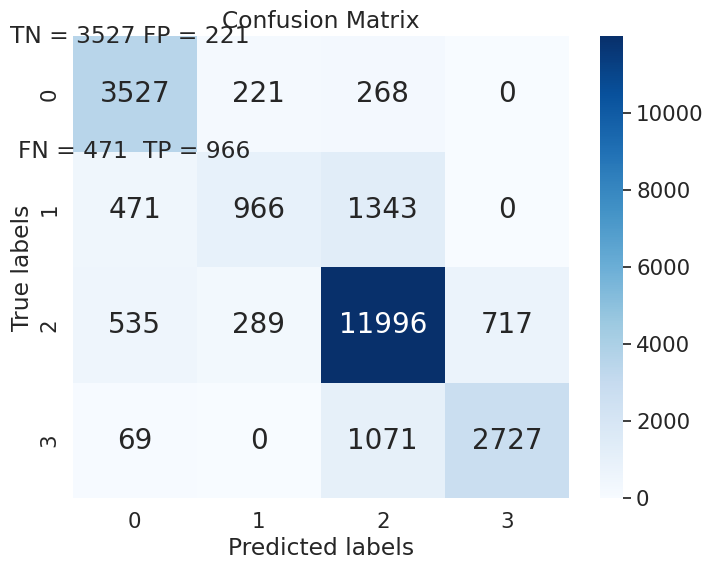

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report


print(classification_report(y_test, y_predict))


cm = confusion_matrix(y_test, y_predict)


TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]


plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, annot_kws={"size": 20}, cmap="Blues", fmt='g')


plt.text(0, 0, f'TN = {TN}', horizontalalignment='center', verticalalignment='center')
plt.text(0, 1, f'FN = {FN}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 0, f'FP = {FP}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 1, f'TP = {TP}', horizontalalignment='center', verticalalignment='center')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Hasil Akurasi yang diraih setelah melakukan Uji Test

In [ ]:
percentage = model_SVM.score(X_test,y_test)
print(f"accuracy = {percentage*100} %")

accuracy = 79.40495867768595 %


In [ ]:
# Menyimpan Model
import pickle

with open('/content/gdrive/MyDrive/Stunting Prediction/Model/statusgiziTPU.pkl','wb') as model_file:
  pickle.dump(model_SVM,model_file)